In [1]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179318,0.163616,0.052605,0.000600,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674433,5.736359,2.420125,0.060003,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df2 = pd.read_csv('/content/label.csv')
df2

,7
0,2
1,1
2,0
3,4
4,1
...,...
9994,2
9995,3
9996,4
9997,5


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def cosine_distance(a, b):
    return 1 - cosine_similarity(a, b)

def jaccard_distance(a, b):
    return pairwise_distances(a, b, metric="jaccard")

def kmeans_clustering(data, k, distance_func, max_iterations=500, stop_criteria='max_iter'):
    data = np.array(data)
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(range(n_samples), k, replace=False)]
    labels = np.zeros(n_samples, dtype=int)
    sse_history = []
    iterations = 0
    start_time = time.time()

    while iterations < max_iterations:
        distances = np.array([distance_func(data, centroid.reshape(1, -1)) for centroid in centroids]).T
        labels = np.argmin(distances, axis=1)
        new_centroids = []
        for i in range(k):
            cluster_data = data[labels == i]
            if len(cluster_data) > 0:
                new_centroids.append(cluster_data.mean(axis=0))
            else:
                new_centroids.append(data[np.random.choice(range(n_samples))])
        new_centroids = np.array(new_centroids)
        sse = sum(np.min(distances, axis=1) ** 2)
        sse_history.append(sse)
        if stop_criteria == 'sse_increase' and len(sse_history) > 1 and sse_history[-1] > sse_history[-2]:
            break
        if stop_criteria == 'centroid_no_change' and np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids
        iterations += 1

    end_time = time.time()
    time_taken = end_time - start_time

    return iterations, time_taken


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
import time

In [ ]:
data = np.loadtxt('data.csv', delimiter=',')
labels = np.loadtxt('label.csv', delimiter=',')

In [ ]:
def kmeans_custom(data, K, max_iter=500, metric='euclidean'):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    prev_centroids = np.zeros(centroids.shape)
    sse = []
    iteration = 0

    while iteration < max_iter and not np.array_equal(prev_centroids, centroids):
        if metric == 'euclidean':
            distances = cdist(data, centroids, 'euclidean')
        elif metric == 'cosine':
            distances = 1 - pairwise_distances(data, centroids, metric='cosine')
        elif metric == 'jaccard':
            distances = 1 - pairwise_distances(data, centroids, metric='jaccard')

        cluster_assignments = np.argmin(distances, axis=1)
        prev_centroids = centroids.copy()
        for k in range(K):
            points_in_cluster = data[cluster_assignments == k]
            if points_in_cluster.size > 0:
                centroids[k] = points_in_cluster.mean(axis=0)
        current_sse = np.sum((data - centroids[cluster_assignments]) ** 2)
        sse.append(current_sse)
        iteration += 1
        if iteration > 1 and sse[-1] > sse[-2]:
            break

    return centroids, cluster_assignments, sse, iteration


In [ ]:

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
import time
from collections import Counter
data = np.loadtxt('data.csv', delimiter=',')
labels = np.loadtxt('label.csv', delimiter=',')
def kmeans_custom(data, K, max_iter=500, metric='euclidean'):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    prev_centroids = np.zeros(centroids.shape)
    sse = []
    iteration = 0

    while iteration < max_iter and not np.array_equal(prev_centroids, centroids):

        if metric == 'euclidean':
            distances = cdist(data, centroids, 'euclidean')
        elif metric == 'cosine':
            distances = 1 - pairwise_distances(data, centroids, metric='cosine')
        elif metric == 'jaccard':
            distances = 1 - pairwise_distances(data, centroids, metric='jaccard')

        cluster_assignments = np.argmin(distances, axis=1)

        prev_centroids = centroids.copy()
        for k in range(K):
            points_in_cluster = data[cluster_assignments == k]
            if points_in_cluster.size > 0:
                centroids[k] = points_in_cluster.mean(axis=0)


        current_sse = np.sum((data - centroids[cluster_assignments]) ** 2)
        sse.append(current_sse)
        iteration += 1
        if iteration > 1 and sse[-1] > sse[-2]:
            break

    return centroids, cluster_assignments, sse, iteration

def calculate_accuracy(assignments, true_labels, K):
    correct_count = 0
    for k in range(K):
        labels_in_cluster = true_labels[assignments == k]
        if len(labels_in_cluster) == 0:
            continue
        most_common_label = Counter(labels_in_cluster).most_common(1)[0][0]
        correct_count += np.sum(labels_in_cluster == most_common_label)

    accuracy = correct_count / len(true_labels)
    return accuracy
K = 10

results = {}
for metric in ['euclidean', 'cosine', 'jaccard']:
    start_time = time.time()
    centroids, assignments, sse, iters = kmeans_custom(data, K, metric=metric)
    elapsed_time = time.time() - start_time

    # Calculate accuracy
    accuracy = calculate_accuracy(assignments, labels, K)

    results[metric] = {
        'SSE': sse[-1],
        'iterations': iters,
        'time': elapsed_time,
        'accuracy': accuracy
    }
print("Results:", results)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Results: {'euclidean': {'SSE': 25543653119.696358, 'iterations': 33, 'time': 5.997744560241699, 'accuracy': 0.6091}, 'cosine': {'SSE': 31529157316.051178, 'iterations': 3, 'time': 0.5622224807739258, 'accuracy': 0.2519}, 'jaccard': {'SSE': 32877050465.829803, 'iterations': 2, 'time': 0.8155198097229004, 'accuracy': 0.1769}}


Question -2

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
import time
from collections import Counter
data = np.loadtxt('data.csv', delimiter=',')
labels = np.loadtxt('label.csv', delimiter=',')

def kmeans_custom(data, K, max_iter=500, metric='euclidean'):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    prev_centroids = np.zeros(centroids.shape)
    sse = []
    iteration = 0

    while iteration < max_iter and not np.array_equal(prev_centroids, centroids):
        if metric == 'euclidean':
            distances = cdist(data, centroids, 'euclidean')
        elif metric == 'cosine':
            distances = 1 - pairwise_distances(data, centroids, metric='cosine')
        elif metric == 'jaccard':
            distances = 1 - pairwise_distances(data, centroids, metric='jaccard')

        cluster_assignments = np.argmin(distances, axis=1)

        prev_centroids = centroids.copy()
        for k in range(K):
            points_in_cluster = data[cluster_assignments == k]
            if points_in_cluster.size > 0:
                centroids[k] = points_in_cluster.mean(axis=0)

        current_sse = np.sum((data - centroids[cluster_assignments]) ** 2)
        sse.append(current_sse)
        iteration += 1
        if iteration > 1 and sse[-1] > sse[-2]:
            break

    return centroids, cluster_assignments, sse, iteration
def calculate_accuracy(assignments, true_labels, K):
    correct_count = 0
    for k in range(K):
        labels_in_cluster = true_labels[assignments == k]
        if len(labels_in_cluster) == 0:
            continue
        most_common_label = Counter(labels_in_cluster).most_common(1)[0][0]
        correct_count += np.sum(labels_in_cluster == most_common_label)
    accuracy = correct_count / len(true_labels)
    return accuracy
K = 10
results = {}

for metric in ['euclidean', 'cosine', 'jaccard']:
    start_time = time.time()
    centroids, assignments, sse, iters = kmeans_custom(data, K, metric=metric)
    elapsed_time = time.time() - start_time

    accuracy = calculate_accuracy(assignments, labels, K)

    results[metric] = {
        'accuracy': accuracy,
        'SSE': sse[-1],
        'iterations': iters,
        'time': elapsed_time
    }

print("Accuracy Comparison Results:", results)

best_metric = max(results, key=lambda x: results[x]['accuracy'])
print(f"The best metric based on accuracy is: {best_metric} with an accuracy of {results[best_metric]['accuracy']}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Accuracy Comparison Results: {'euclidean': {'accuracy': 0.6046, 'SSE': 25323449177.537415, 'iterations': 60, 'time': 8.786897897720337}, 'cosine': {'accuracy': 0.2127, 'SSE': 31857253827.277912, 'iterations': 2, 'time': 0.4727742671966553}, 'jaccard': {'accuracy': 0.203, 'SSE': 32282183696.503365, 'iterations': 2, 'time': 0.8229808807373047}}
The best metric based on accuracy is: euclidean with an accuracy of 0.6046


Question number - 3

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
import time

data = np.loadtxt('data.csv', delimiter=',')
labels = np.loadtxt('label.csv', delimiter=',')

def kmeans_custom(data, K, max_iter=500, metric='euclidean'):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    prev_centroids = np.zeros(centroids.shape)
    sse = []
    iteration = 0
    start_time = time.time()

    while iteration < max_iter:
        if metric == 'euclidean':
            distances = cdist(data, centroids, 'euclidean')
        elif metric == 'cosine':
            distances = 1 - pairwise_distances(data, centroids, metric='cosine')
        elif metric == 'jaccard':
            distances = 1 - pairwise_distances(data, centroids, metric='jaccard')

        cluster_assignments = np.argmin(distances, axis=1)

        prev_centroids = centroids.copy()
        for k in range(K):
            points_in_cluster = data[cluster_assignments == k]
            if points_in_cluster.size > 0:
                centroids[k] = points_in_cluster.mean(axis=0)

        current_sse = np.sum((data - centroids[cluster_assignments]) ** 2)
        sse.append(current_sse)
        iteration += 1

        if np.array_equal(prev_centroids, centroids):
            break
        if iteration > 1 and sse[-1] > sse[-2]:
            break

    elapsed_time = time.time() - start_time
    return centroids, cluster_assignments, sse, iteration, elapsed_time
K = 10
q3_results = {}

for metric in ['euclidean', 'cosine', 'jaccard']:
    centroids, assignments, sse, iters, elapsed_time = kmeans_custom(data, K, metric=metric)

    q3_results[metric] = {
        'iterations': iters,
        'time': elapsed_time
    }

print("Q3 Results (Iterations and Time):", q3_results)

max_iters_metric = max(q3_results, key=lambda x: q3_results[x]['iterations'])
max_time_metric = max(q3_results, key=lambda x: q3_results[x]['time'])

print(f"The metric requiring the most iterations is: {max_iters_metric} with {q3_results[max_iters_metric]['iterations']} iterations")
print(f"The metric requiring the most time is: {max_time_metric} with {q3_results[max_time_metric]['time']} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Q3 Results (Iterations and Time): {'euclidean': {'iterations': 50, 'time': 7.409000396728516}, 'cosine': {'iterations': 3, 'time': 0.5996677875518799}, 'jaccard': {'iterations': 2, 'time': 0.719123125076294}}
The metric requiring the most iterations is: euclidean with 50 iterations
The metric requiring the most time is: euclidean with 7.409000396728516 seconds


In [ ]:
def kmeans_custom_with_condition(data, K, max_iter=100, metric='euclidean', stop_condition='centroid_change'):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    prev_centroids = np.zeros(centroids.shape)
    sse = []
    iteration = 0

    while iteration < max_iter:
        if metric == 'euclidean':
            distances = cdist(data, centroids, 'euclidean')
        elif metric == 'cosine':
            distances = 1 - pairwise_distances(data, centroids, metric='cosine')
        elif metric == 'jaccard':
            distances = 1 - pairwise_distances(data, centroids, metric='jaccard')

        cluster_assignments = np.argmin(distances, axis=1)

        prev_centroids = centroids.copy()
        for k in range(K):
            points_in_cluster = data[cluster_assignments == k]
            if points_in_cluster.size > 0:
                centroids[k] = points_in_cluster.mean(axis=0)

        current_sse = np.sum((data - centroids[cluster_assignments]) ** 2)
        sse.append(current_sse)
        iteration += 1
        if stop_condition == 'centroid_change' and np.array_equal(prev_centroids, centroids):
            break
        if stop_condition == 'sse_increase' and iteration > 1 and sse[-1] > sse[-2]:
            break
        if stop_condition == 'max_iter' and iteration >= max_iter:
            break

    return centroids, cluster_assignments, sse, iteration

K = 10
q4_results = {}

for metric in ['euclidean', 'cosine', 'jaccard']:
    metric_results = {}
    for condition in ['centroid_change', 'sse_increase', 'max_iter']:
        _, _, sse, iters = kmeans_custom_with_condition(data, K, max_iter=100, metric=metric, stop_condition=condition)
        metric_results[condition] = sse[-1]
    q4_results[metric] = metric_results

print("Q4 Results (Final SSEs by Stopping Condition):", q4_results)

for metric, sse_values in q4_results.items():
    print(f"\nFinal SSE values for {metric} K-means:")
    for condition, sse_value in sse_values.items():
        print(f"- Stopping Condition ({condition}): SSE = {sse_value}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

Q4 Results (Final SSEs by Stopping Condition): {'euclidean': {'centroid_change': 25408393865.84082, 'sse_increase': 25324244026.823772, 'max_iter': 25508754071.122387}, 'cosine': {'centroid_change': 31031406593.047348, 'sse_increase': 31370912812.293575, 'max_iter': 31958365079.018116}, 'jaccard': {'centroid_change': 34364573698.591385, 'sse_increase': 32593276809.93281, 'max_iter': 34364573698.591385}}

Final SSE values for euclidean K-means:
- Stopping Condition (centroid_change): SSE = 25408393865.84082
- Stopping Condition (sse_increase): SSE = 25324244026.823772
- Stopping Condition (max_iter): SSE = 25508754071.122387

Final SSE values for cosine K-means:
- Stopping Condition (centroid_change): SSE = 31031406593.047348
- Stopping Condition (sse_increase): SSE = 31370912812.293575
- Stopping Condition (max_iter): SSE = 31958365079.018116

Final SSE values for jaccard K-means:
- Stopping Condition (centroid_change): SSE = 34364573698.591385
- Stopping Condition (sse_increase): SSE 

Task - 2

In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357284 sha256=6d4faf3069f2a57cb3bd643f6438771601e0b6d2ffb460e22ca6cd1b969124ec
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Evaluating PMF...
Evaluating User-based CF with cosine similarity and 10 neighbors...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating Item-based CF with cosine similarity and 10 neighbors...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating User-based CF with cosine similarity and 20 neighbors...
Computing the cosi

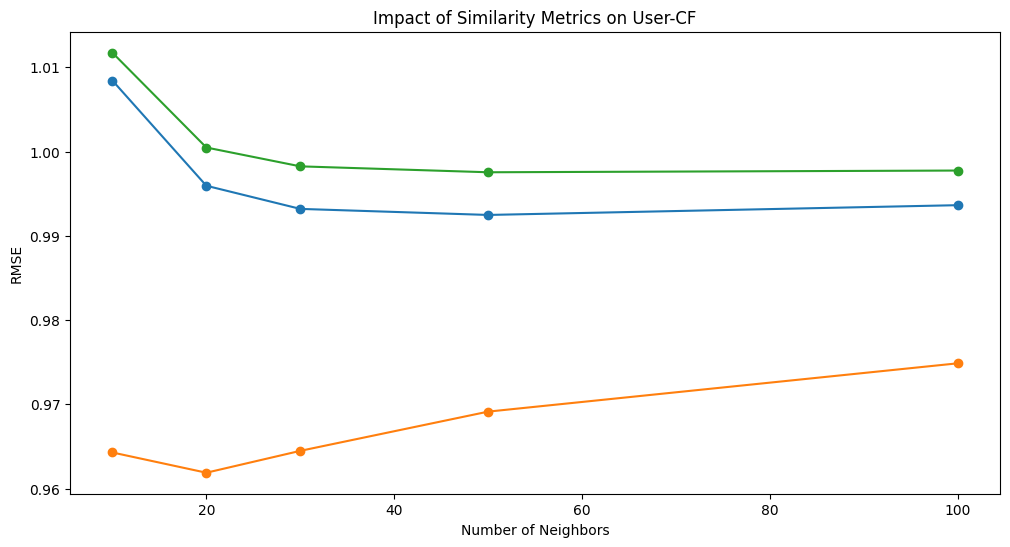

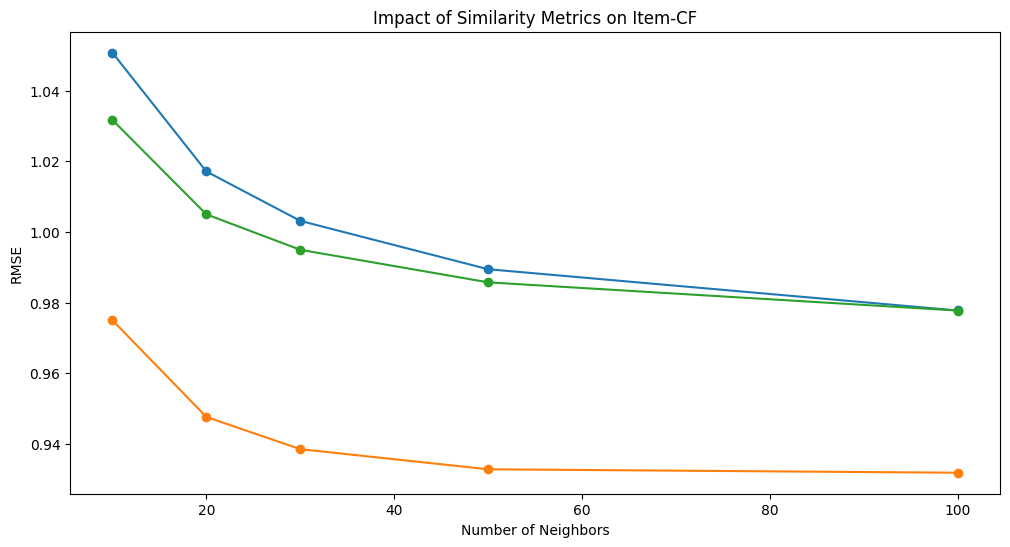

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD, KNNBasic
from surprise.model_selection import cross_validate, KFold
from surprise.accuracy import rmse, mae
import matplotlib.pyplot as plt

file_path = "/content/ratings_small.csv"
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

results = {
    "model": [],
    "similarity": [],
    "neighbors": [],
    "mae": [],
    "rmse": []
}

def evaluate_model(algo, data, kf):
    maes = []
    rmses = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        maes.append(mae(predictions, verbose=False))
        rmses.append(rmse(predictions, verbose=False))
    return sum(maes) / len(maes), sum(rmses) / len(rmses)
print("Evaluating PMF...")
pmf = SVD()
mae_pmf, rmse_pmf = evaluate_model(pmf, data, kf)
results["model"].append("PMF")
results["similarity"].append("N/A")
results["neighbors"].append("N/A")
results["mae"].append(mae_pmf)
results["rmse"].append(rmse_pmf)

similarities = ['cosine', 'msd', 'pearson']
neighbor_values = [10, 20, 30, 50, 100]

for sim in similarities:
    for neighbor in neighbor_values:
        print(f"Evaluating User-based CF with {sim} similarity and {neighbor} neighbors...")
        user_cf = KNNBasic(k=neighbor, sim_options={'name': sim, 'user_based': True})
        mae_user, rmse_user = evaluate_model(user_cf, data, kf)
        results["model"].append("User-CF")
        results["similarity"].append(sim)
        results["neighbors"].append(neighbor)
        results["mae"].append(mae_user)
        results["rmse"].append(rmse_user)
        print(f"Evaluating Item-based CF with {sim} similarity and {neighbor} neighbors...")
        item_cf = KNNBasic(k=neighbor, sim_options={'name': sim, 'user_based': False})
        mae_item, rmse_item = evaluate_model(item_cf, data, kf)
        results["model"].append("Item-CF")
        results["similarity"].append(sim)
        results["neighbors"].append(neighbor)
        results["mae"].append(mae_item)
        results["rmse"].append(rmse_item)
results_df = pd.DataFrame(results)
for model in ['User-CF', 'Item-CF']:
    plt.figure(figsize=(12, 6))
    for sim in similarities:
        subset = results_df[(results_df['model'] == model) & (results_df['similarity'] == sim)]
        plt.plot(subset['neighbors'], subset['rmse'], marker='o', label=f'{sim}')
    plt.title(f'Impact of Similarity Metrics on {model}')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.legend


Evaluating PMF...
Evaluating User-based CF with cosine similarity and 10 neighbors...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating Item-based CF with cosine similarity and 10 neighbors...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating User-based CF with cosine similarity and 20 neighbors...
Computing the cosi

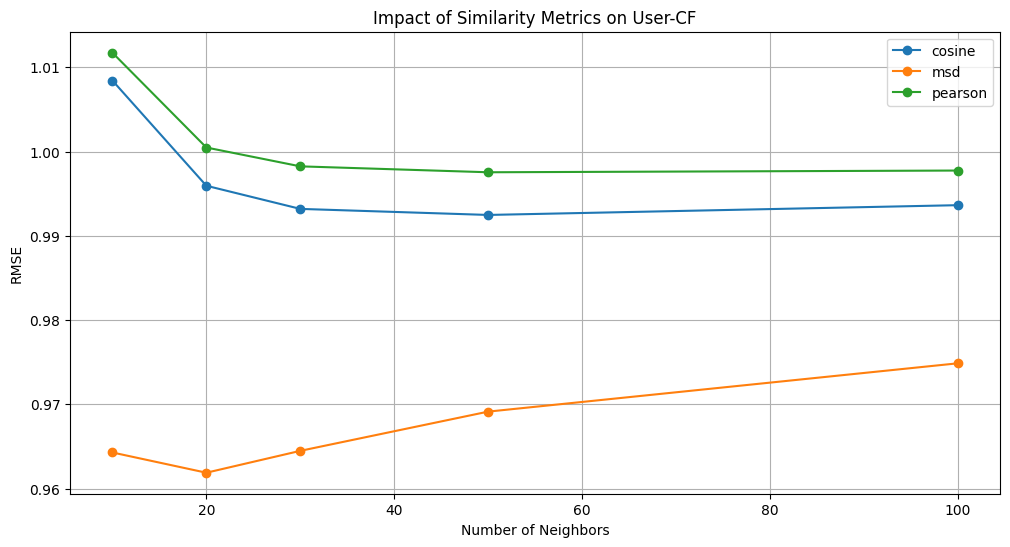

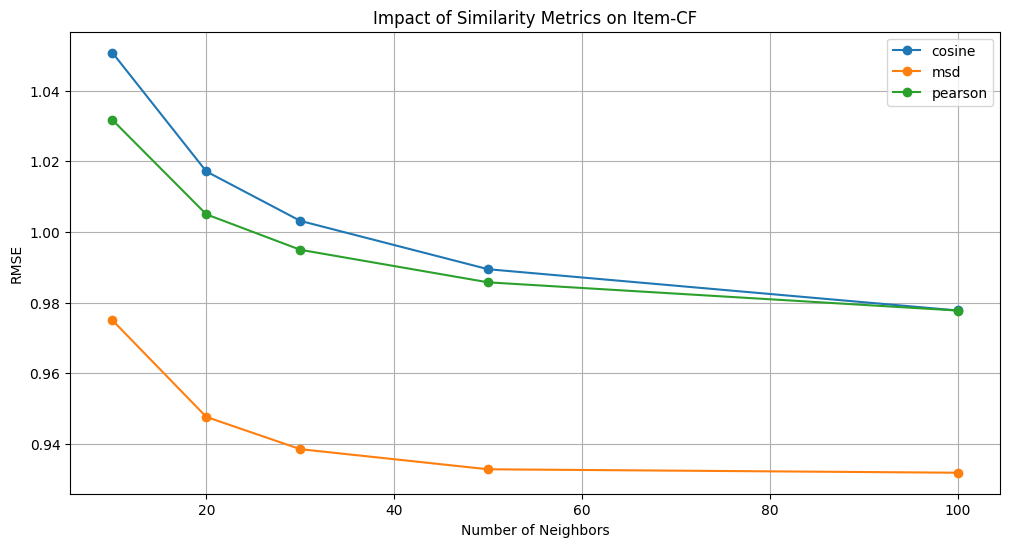

KeyError: 0

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import KFold
from surprise.accuracy import rmse, mae
import matplotlib.pyplot as plt

file_path = "ratings_small.csv"
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
def evaluate_model(algo, data, kf):
    maes, rmses = [], []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        maes.append(mae(predictions, verbose=False))
        rmses.append(rmse(predictions, verbose=False))
    return sum(maes) / len(maes), sum(rmses) / len(rmses)

results = {"model": [], "similarity": [], "neighbors": [], "mae": [], "rmse": []}

print("Evaluating PMF...")
pmf = SVD()
mae_pmf, rmse_pmf = evaluate_model(pmf, data, kf)
results["model"].append("PMF")
results["similarity"].append("N/A")
results["neighbors"].append("N/A")
results["mae"].append(mae_pmf)
results["rmse"].append(rmse_pmf)

similarities = ['cosine', 'msd', 'pearson']
neighbor_values = [10, 20, 30, 50, 100]

for sim in similarities:
    for neighbor in neighbor_values:
        print(f"Evaluating User-based CF with {sim} similarity and {neighbor} neighbors...")
        user_cf = KNNBasic(k=neighbor, sim_options={'name': sim, 'user_based': True})
        mae_user, rmse_user = evaluate_model(user_cf, data, kf)
        results["model"].append("User-CF")
        results["similarity"].append(sim)
        results["neighbors"].append(neighbor)
        results["mae"].append(mae_user)
        results["rmse"].append(rmse_user)
        print(f"Evaluating Item-based CF with {sim} similarity and {neighbor} neighbors...")
        item_cf = KNNBasic(k=neighbor, sim_options={'name': sim, 'user_based': False})
        mae_item, rmse_item = evaluate_model(item_cf, data, kf)
        results["model"].append("Item-CF")
        results["similarity"].append(sim)
        results["neighbors"].append(neighbor)
        results["mae"].append(mae_item)
        results["rmse"].append(rmse_item)

results_df = pd.DataFrame(results)

print("\nAverage MAE and RMSE for each model:\n")
print(results_df.groupby("model")[["mae", "rmse"]].mean())

for model in ['User-CF', 'Item-CF']:
    plt.figure(figsize=(12, 6))
    for sim in similarities:
        subset = results_df[(results_df['model'] == model) & (results_df['similarity'] == sim)]
        plt.plot(subset['neighbors'], subset['rmse'], marker='o', label=f'{sim}')
    plt.title(f'Impact of Similarity Metrics on {model}')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.show()
best_k_user = results_df[(results_df['model'] == 'User-CF')].loc[results_df['rmse'].idxmin()]
best_k_item = results_df[(results_df['model'] == 'Item-CF')].loc[results_df['rmse'].idxmin()]

print(f"Best K for User-based CF: {best_k_user['neighbors']} (RMSE: {best_k_user['rmse']:.4f})")
print(f"Best K for Item-based CF: {best_k_item['neighbors']} (RMSE: {best_k_item['rmse']:.4f})")

for model in ['User-CF', 'Item-CF']:
    plt.figure(figsize=(12, 6))
    subset = results_df[(results_df['model'] == model) & (results_df['similarity'] == 'cosine')]
    plt.plot(subset['neighbors'], subset['rmse'], marker='o', label='Cosine Similarity')
    plt.title(f'Impact of Number of Neighbors on {model}')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate
file_path = "/content/ratings_small.csv"
reader = Reader(line_format="user item rating timestamp", sep=",", skip_lines=1, rating_scale=(0.5, 5.0))

data = Dataset.load_from_file(file_path, reader=reader)

print("Evaluating Probabilistic Matrix Factorization (PMF)...")
pmf = SVD()
pmf_results = cross_validate(pmf, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

print("\nEvaluating User-Based Collaborative Filtering...")
user_based_cf = KNNBasic(sim_options={"user_based": True})
user_results = cross_validate(user_based_cf, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

print("\nEvaluating Item-Based Collaborative Filtering...")
item_based_cf = KNNBasic(sim_options={"user_based": False})
item_results = cross_validate(item_based_cf, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

def summarize_results(results):
    """Calculate mean MAE and RMSE from cross-validation results."""
    mean_rmse = results["test_rmse"].mean()
    mean_mae = results["test_mae"].mean()
    return mean_rmse, mean_mae

pmf_rmse, pmf_mae = summarize_results(pmf_results)
user_rmse, user_mae = summarize_results(user_results)
item_rmse, item_mae = summarize_results(item_results)

print("\nAverage MAE and RMSE:")
print(f"Probabilistic Matrix Factorization (PMF): RMSE={pmf_rmse:.4f}, MAE={pmf_mae:.4f}")
print(f"User-Based Collaborative Filtering: RMSE={user_rmse:.4f}, MAE={user_mae:.4f}")
print(f"Item-Based Collaborative Filtering: RMSE={item_rmse:.4f}, MAE={item_mae:.4f}")

best_model = min(
    [("PMF", pmf_rmse, pmf_mae),
     ("User-Based CF", user_rmse, user_mae),
     ("Item-Based CF", item_rmse, item_mae)],
    key=lambda x: (x[1], x[2])
)

print(f"\nThe best model is {best_model[0]} with RMSE={best_model[1]:.4f} and MAE={best_model[2]:.4f}.")


Evaluating Probabilistic Matrix Factorization (PMF)...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8877  0.9023  0.8887  0.9044  0.9041  0.8974  0.0076  
MAE (testset)     0.6834  0.6957  0.6864  0.6958  0.6953  0.6913  0.0053  
Fit time          2.94    5.04    3.72    1.79    1.59    3.02    1.27    
Test time         0.46    0.44    0.41    0.22    0.23    0.35    0.10    

Evaluating User-Based Collaborative Filtering...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  

Evaluating similarity: cosine for User-based CF...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9965  0.9885  0.9932  0.9951  0.9946  0.9936  0.0027  
Fit time          1.62    0.24    0.24    0.23    0.35    0.54    0.54    
Test time         4.06    1.71    1.49    2.67    2.42    2.47    0.91    
Evaluating similarity: cosine for Item-based CF...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

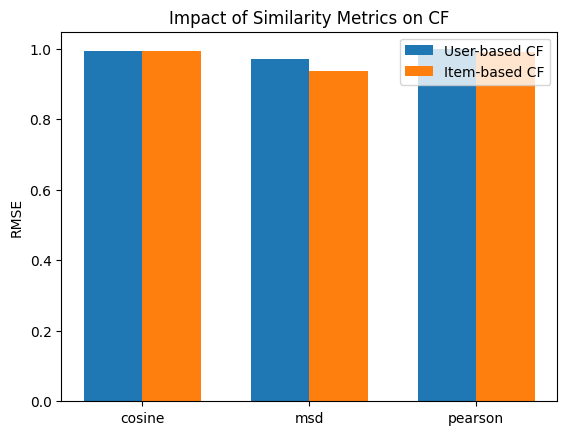

Evaluating number of neighbors for User-based CF...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

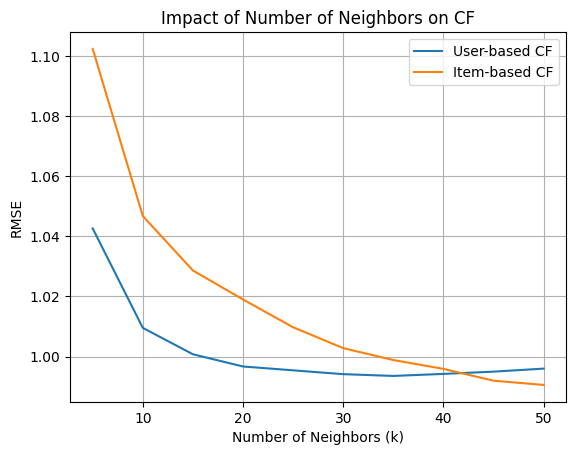

Best k for User-based CF: 35, RMSE=0.9935
Best k for Item-based CF: 50, RMSE=0.9905
The best k is different for User-based and Item-based Collaborative Filtering.


In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

file_path = "ratings_small.csv"

reader = Reader(line_format="user item rating timestamp", sep=",", skip_lines=1, rating_scale=(0.5, 5.0))
data = Dataset.load_from_file(file_path, reader=reader)
def evaluate_similarity(similarity, user_based):
    algo = KNNBasic(sim_options={"name": similarity, "user_based": user_based})
    results = cross_validate(algo, data, measures=["RMSE"], cv=5, verbose=True)
    mean_rmse = results["test_rmse"].mean()
    return mean_rmse
def evaluate_neighbors(k_values, user_based):
    results = []
    for k in k_values:
        algo = KNNBasic(k=k, sim_options={"name": "cosine", "user_based": user_based})
        cv_results = cross_validate(algo, data, measures=["RMSE"], cv=5, verbose=False)
        results.append(cv_results["test_rmse"].mean())
    return results
similarities = ["cosine", "msd", "pearson"]
user_cf_rmse = []
item_cf_rmse = []

for similarity in similarities:
    print(f"Evaluating similarity: {similarity} for User-based CF...")
    user_cf_rmse.append(evaluate_similarity(similarity, user_based=True))

    print(f"Evaluating similarity: {similarity} for Item-based CF...")
    item_cf_rmse.append(evaluate_similarity(similarity, user_based=False))
x = np.arange(len(similarities))
width = 0.35

plt.bar(x - width/2, user_cf_rmse, width, label="User-based CF")
plt.bar(x + width/2, item_cf_rmse, width, label="Item-based CF")
plt.xticks(x, similarities)
plt.ylabel("RMSE")
plt.title("Impact of Similarity Metrics on CF")
plt.legend()
plt.show()

k_values = range(5, 51, 5)
print("Evaluating number of neighbors for User-based CF...")
user_neighbors_rmse = evaluate_neighbors(k_values, user_based=True)

print("Evaluating number of neighbors for Item-based CF...")
item_neighbors_rmse = evaluate_neighbors(k_values, user_based=False)
plt.plot(k_values, user_neighbors_rmse, label="User-based CF")
plt.plot(k_values, item_neighbors_rmse, label="Item-based CF")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("Impact of Number of Neighbors on CF")
plt.legend()
plt.grid()
plt.show()
best_k_user = k_values[np.argmin(user_neighbors_rmse)]
best_k_item = k_values[np.argmin(item_neighbors_rmse)]

print(f"Best k for User-based CF: {best_k_user}, RMSE={min(user_neighbors_rmse):.4f}")
print(f"Best k for Item-based CF: {best_k_item}, RMSE={min(item_neighbors_rmse):.4f}")

if best_k_user == best_k_item:
    print("The best k is the same for both User-based and Item-based Collaborative Filtering.")
else:
    print("The best k is different for User-based and Item-based Collaborative Filtering.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.metrics import jaccard_score
import time
df = pd.read_csv("data.csv")
df2 = pd.read_csv("label.csv")
data = df.values
labels = df2.values.ravel()

def calculate_sse(data, centroids, assignments):
    sse = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[assignments == i]
        sse += ((cluster_points - centroid) ** 2).sum()
    return sse

def kmeans_clustering(data, k, distance_func, max_iterations, stop_criteria):

    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    assignments = np.zeros(data.shape[0])
    prev_sse = None

    for iteration in range(max_iterations):
        distances = distance_func(data, centroids)
        assignments = np.argmin(distances, axis=1)
        new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids
        current_sse = calculate_sse(data, centroids, assignments)
        if stop_criteria == "sse_increase" and prev_sse is not None and current_sse > prev_sse:
            break
        prev_sse = current_sse

    return iteration + 1
def euclidean_distances_func(data, centroids):
    return euclidean_distances(data, centroids)

def cosine_distances_func(data, centroids):
    return 1 - cosine_similarity(data, centroids)

def jaccard_distances_func(data, centroids):
    binarized_data = np.where(data > 0, 1, 0)
    binarized_centroids = np.where(centroids > 0, 1, 0)
    return np.array([[1 - jaccard_score(binarized_data[i], binarized_centroids[j])
                      for j in range(centroids.shape[0])]
                     for i in range(binarized_data.shape[0])])
distance_metrics = {
    "Euclidean": euclidean_distances_func,
    "Cosine": cosine_distances_func,
    "Jaccard": jaccard_distances_func
}

stop_criteria_list = ["sse_increase", "centroid_no_change", "max_iterations"]
k = len(np.unique(labels))
max_iterations = 500

results = []

for metric_name, distance_func in distance_metrics.items():
    for stop_criteria in stop_criteria_list:
        start_time = time.time()
        iterations = kmeans_clustering(data, k, distance_func, max_iterations, stop_criteria)
        time_taken = time.time() - start_time
        results.append({
            "Metric": metric_name,
            "Stop Criteria": stop_criteria,
            "Iterations": iterations,
            "Time Taken (s)": time_taken
        })
results_df = pd.DataFrame(results)
print(results_df)


<ipython-input-7-c635f3871425>:36: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-7-c635f3871425>:36: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-7-c635f3871425>:36: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-7-c635f3871425>:36: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([

In [4]:
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans_variants(X, k, distance_type='euclidean', max_iterations=500):
    results = {}
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    stop_criteria = [
        'increase_sse',
        'no_centroid_change',
        'max_iterations'
    ]

    for stop_criterion in stop_criteria:
        start_time = time.time()

        if distance_type == 'euclidean':
            centroids, labels, iterations, initial_sse, final_sse = euclidean_kmeans(X_scaled, k, stop_criterion)
        elif distance_type == 'cosine':
            centroids, labels, iterations, initial_sse, final_sse = cosine_kmeans(X_scaled, k, stop_criterion)
        else:
            centroids, labels, iterations, initial_sse, final_sse = jaccard_kmeans(X_scaled, k, stop_criterion)

        end_time = time.time()

        results[stop_criterion] = {
            'iterations': iterations,
            'time_taken': end_time - start_time,
            'initial_sse': initial_sse,
            'final_sse': final_sse
        }

    return results

def euclidean_kmeans(X, k, stop_criterion, max_iterations=500):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    iterations = 0
    initial_sse = None

    while iterations < max_iterations:
        prev_centroids = centroids.copy()
        distances = np.array([np.sqrt(((X - c) ** 2).sum(axis=1)) for c in centroids])
        labels = np.argmin(distances, axis=0)
        for i in range(k):
            centroids[i] = X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else prev_centroids[i]
        current_sse = np.sum(np.min(distances.T ** 2, axis=1))
        if iterations == 0:
            initial_sse = current_sse
        if stop_criterion == 'increase_sse':
            if iterations > 0 and current_sse > prev_sse:
                break
        elif stop_criterion == 'no_centroid_change':
            if np.allclose(centroids, prev_centroids):
                break
        elif stop_criterion == 'max_iterations':
            if iterations == max_iterations - 1:
                break

        prev_sse = current_sse
        iterations += 1

    return centroids, labels, iterations, initial_sse, current_sse

def cosine_kmeans(X, k, stop_criterion, max_iterations=500):
    X_norm = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    iterations = 0
    initial_sse = None

    while iterations < max_iterations:
        prev_centroids = centroids.copy()
        distances = np.array([1 - np.dot(X_norm, c) for c in centroids])
        labels = np.argmin(distances, axis=0)
        for i in range(k):
            cluster_points = X_norm[labels == i]
            centroids[i] = cluster_points.mean(axis=0) if len(cluster_points) > 0 else prev_centroids[i]
            centroids[i] /= np.linalg.norm(centroids[i])
        current_sse = np.sum(np.min(distances.T ** 2, axis=1))
        if iterations == 0:
            initial_sse = current_sse
        if stop_criterion == 'increase_sse':
            if iterations > 0 and current_sse > prev_sse:
                break
        elif stop_criterion == 'no_centroid_change':
            if np.allclose(centroids, prev_centroids):
                break
        elif stop_criterion == 'max_iterations':
            if iterations == max_iterations - 1:
                break

        prev_sse = current_sse
        iterations += 1

    return centroids, labels, iterations, initial_sse, current_sse

def jaccard_kmeans(X, k, stop_criterion, max_iterations=500):
    X_binary = np.where(X > 0, 1, 0)
    centroids = X_binary[np.random.choice(X_binary.shape[0], k, replace=False)]

    iterations = 0
    initial_sse = None

    while iterations < max_iterations:
        prev_centroids = centroids.copy()
        distances = np.array([np.array([1 - (np.minimum(x, c).sum() / np.maximum(x, c).sum()) for x in X_binary]) for c in centroids])
        labels = np.argmin(distances, axis=0)
        for i in range(k):
            cluster_points = X_binary[labels == i]
            centroids[i] = cluster_points.mean(axis=0) if len(cluster_points) > 0 else prev_centroids[i]
            centroids[i] = np.where(centroids[i] > 0.5, 1, 0)
        current_sse = np.sum(np.min(distances.T ** 2, axis=1))
        if iterations == 0:
            initial_sse = current_sse
        if stop_criterion == 'increase_sse':
            if iterations > 0 and current_sse > prev_sse:
                break
        elif stop_criterion == 'no_centroid_change':
            if np.allclose(centroids, prev_centroids):
                break
        elif stop_criterion == 'max_iterations':
            if iterations == max_iterations - 1:
                break

        prev_sse = current_sse
        iterations += 1

    return centroids, labels, iterations, initial_sse, current_sse
df = pd.read_csv('data.csv')
df2 = pd.read_csv('label.csv')
X = df.values
k = len(np.unique(df2.values))
print("Euclidean K-means:")
euc_results = kmeans_variants(X, k, 'euclidean')
for criterion, result in euc_results.items():
    print(f"{criterion.replace('_', ' ').title()}:")
    print(f"No. of Iterations: {result['iterations']}")
    print(f"Time Taken (in sec): {result['time_taken']:.2f}")
    print(f"Initial SSE: {result['initial_sse']:.2f}")
    print(f"Final SSE: {result['final_sse']:.2f}\n")

print("\nCosine K-means:")
cos_results = kmeans_variants(X, k, 'cosine')
for criterion, result in cos_results.items():
    print(f"{criterion.replace('_', ' ').title()}:")
    print(f"No. of Iterations: {result['iterations']}")
    print(f"Time Taken (in sec): {result['time_taken']:.2f}")
    print(f"Initial SSE: {result['initial_sse']:.2f}")
    print(f"Final SSE: {result['final_sse']:.2f}\n")

print("\nJaccard K-means:")
jac_results = kmeans_variants(X, k, 'jaccard')
for criterion, result in jac_results.items():
    print(f"{criterion.replace('_', ' ').title()}:")
    print(f"No. of Iterations: {result['iterations']}")
    print(f"Time Taken (in sec): {result['time_taken']:.2f}")
    print(f"Initial SSE: {result['initial_sse']:.2f}")
    print(f"Final SSE: {result['final_sse']:.2f}\n")

Euclidean K-means:
Increase Sse:
No. of Iterations: 500
Time Taken (in sec): 224.05
Initial SSE: 7810593.11
Final SSE: 5568560.66

No Centroid Change:
No. of Iterations: 58
Time Taken (in sec): 22.37
Initial SSE: 8065327.99
Final SSE: 5554668.68

Max Iterations:
No. of Iterations: 499
Time Taken (in sec): 187.82
Initial SSE: 8401427.09
Final SSE: 5555034.34


Cosine K-means:
Increase Sse:
No. of Iterations: 58
Time Taken (in sec): 7.39
Initial SSE: 5186.44
Final SSE: 3056.14

No Centroid Change:
No. of Iterations: 153
Time Taken (in sec): 21.29
Initial SSE: 5159.35
Final SSE: 3056.36

Max Iterations:
No. of Iterations: 499
Time Taken (in sec): 66.91
Initial SSE: 5740.92
Final SSE: 3095.80


Jaccard K-means:
Increase Sse:
No. of Iterations: 1
Time Taken (in sec): 2.33
Initial SSE: 4111.43
Final SSE: 9999.00

No Centroid Change:
No. of Iterations: 1
Time Taken (in sec): 2.33
Initial SSE: 4222.91
Final SSE: 9999.00

Max Iterations:
No. of Iterations: 499
Time Taken (in sec): 627.27
Initia